In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import squarify
import warnings

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from scipy import stats as st
from tqdm import tqdm

%matplotlib inline

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
plt.style.use('seaborn-v0_8')
colors = sns.color_palette('colorblind', as_cmap=True)


In [4]:
path_to_file = 'data/Grocery_Database.xlsx'


In [5]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names


['Grosto DB', 'Fact Summary']

In [6]:
initial_data = xl.parse('Grosto DB')


In [7]:
pd.set_option('display.max_columns', None)


## 1. Першим етапом нашого дослідження є первинне знайомство з даними, очищення їх від аномалій або дублікатів, заповнення пропущених значень (за їх наявності), перевірка точності розрахунків (якщо деякі дані є результатом операцій над іншими даними з цього ж датасету) тощо.

In [8]:
initial_data.head(5)


,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,Oraganic 4 Life Red onions,Organic 4 Life,270 g,3.52,1,0.01,3.4848,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,LIVEWELL Italian mesclun salad,LIVEWELL,570 g,4.41,1,0.01,4.3659,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


- розмір датасету

In [9]:
initial_data.shape


(50447, 32)

- типи даних в датасеті

In [10]:
initial_data.dtypes


Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

- наявність пропущених даних

In [11]:
initial_data.isna().sum()


Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

- наявність дублікатів

In [12]:
initial_data.duplicated().value_counts()


False    50446
True         1
Name: count, dtype: int64

In [13]:
clean_data = initial_data.copy(deep=True)
clean_data.drop_duplicates(inplace=True)


In [14]:
clean_data.head(3)


,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693


- приведення назв колонок до уніфікованого виду

In [15]:
clean_data.columns


Index(['Receipt Number', 'Date', 'Year', 'Month', 'Time', 'Mobile Number',
       'Membership ID', 'Loyalty Card Points', 'Age', 'Gender', 'City',
       'Country', 'Category', 'Sub_Category', 'Items', 'Brand ',
       'Description ', 'Price', 'QTY', 'DISC', 'Amount', 'Net Bill Amount',
       'GST', 'Gross Bill Amount', 'Payment Mode', 'Bank Name',
       '% Profit Margin', '% Operating Cost', '% Product Cost',
       'Profit Margin', 'Operating Cost', 'Product Cost'],
      dtype='object')

In [16]:
new_columns = []
for col in clean_data.columns:
    new_columns.append(col.strip().replace('%', 'Percent'))
clean_data.columns = new_columns


- перевірка вірності розрахунку показника 'Amount'

In [17]:
clean_data.insert(
                loc=clean_data.columns.get_loc('Amount') + 1,
                column='Check_amount',
                value=clean_data['Price'] * clean_data['QTY'] * (1 - clean_data['DISC'])
)


clean_data.loc[:, 'Summary_Amount'] = round(clean_data['Check_amount'] - clean_data['Amount'], 4)
clean_data['Summary_Amount'].value_counts()


Summary_Amount
0.0    50446
Name: count, dtype: int64

- переведення даних у категоріальний тип

In [18]:
for col in ['Gender', 'City', 'Country', 'Category', 'Sub_Category', 'Items',
       'Brand']:
    clean_data[col] = pd.Categorical(clean_data[col])
    

- дослідження розподілу ключових числових показників

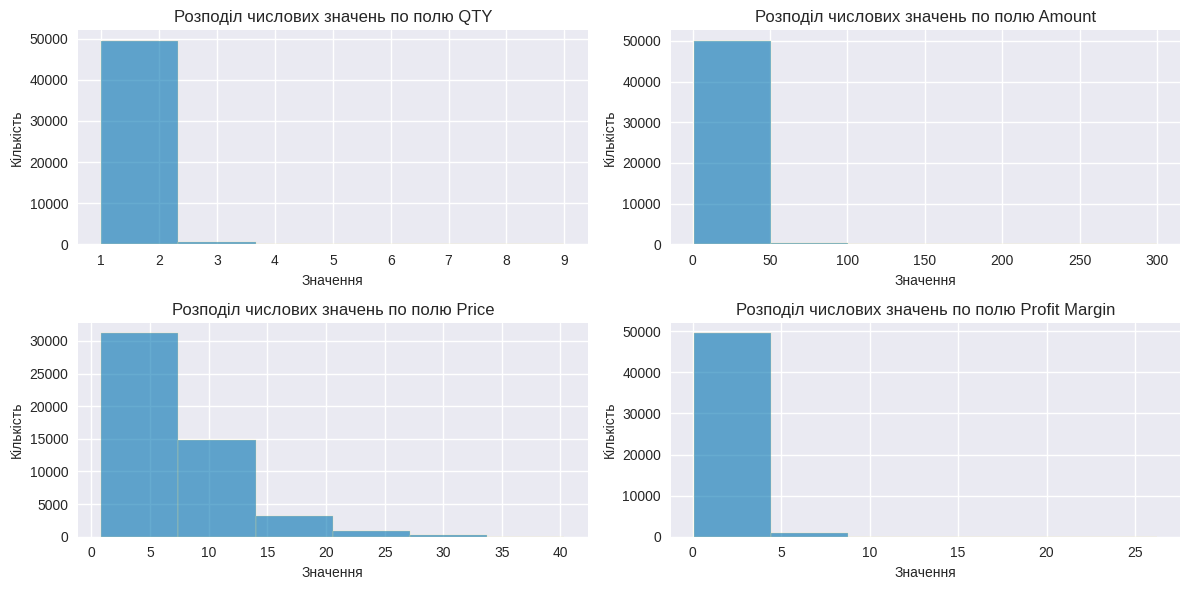

In [19]:
numerical_values = clean_data[['QTY', 'Amount', 'Price', 'Profit Margin']]

nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))
for i, column in enumerate(numerical_values.columns):
    row = i // ncols
    col = i % ncols
    axes[row, col].hist(numerical_values[column], bins=6, color=colors[0], edgecolor='khaki', alpha=0.6)
    axes[row, col].set_title(f'Розподіл числових значень по полю {column}', fontsize=12)
    axes[row, col].set_xlabel('Значення', fontsize=10)
    axes[row, col].set_ylabel('Кількість', fontsize=10)
plt.tight_layout();


### Результати 1 етапу:  
- даний датасет містить 50447 строчок та 32 колонки;  
- типи даних в колонках відповідають фактичним значенням, що в них зберігаються;  
- виявлено, що датасет містив 1 дублікат, який був видалений, в результаті чого кількість строчок в датасеті дорівнює 50446;  
- перевірка правильності розрахунку колонки 'Amount' показала, що розрахунок у всіх випадках вірний, про що свідчить кількість нульових значень в 'Summary_Amount', яке відповідає кількості строчок в датасеті 50446;
- дані у колонках, які містять категоріальні дані, було перетворено на тип "категоріальний" для оптимізації використання пам'яті та покращення швидкодії обробки датафрейму;  
- за результатами аналізу назв колонок датасету, виявлено, що деякі назви містять в собі зайві елементи, такі як пробіли. Для спрощення подальшої роботи з датасетом, зайві символи видалено, а також замінено знак '%' на відповідне слово 'Percent';
- проведено аналіз шляхом візуалізації розподілу ключових кількісних показників. Виявлено, що розподіл даних не відповідає нормальному розподілу, і у більшості випадків спостерігається незначна кількість викідів, що відображено у вигляді "хвостів" на графіках. Відповідно до структури наших даних, ці "хвости" виникають в результаті розділення загального чеку покупки на окремі позиції і "хвостом" є саме ті випадки, коли в чеку була одна позиція на суму, що значно відрізняється від середнього. Виходячи з цього, немає підстав не враховувати ці дані в подальшому аналізі.

# 2.Другою фазою аналізу є формулювання запитань, відповіді на які нададуть бізнесу можливість удосконалити або трансформувати процеси для досягнення оптимальних результатів в своїй діяльності.

### 2.1.Розподіл загальної вартості здійснених покупок та прибутковості по рокам в розрізі країн

In [20]:
countries_year_amount_pivot = clean_data.pivot_table(index='Year', columns='Country', values='Amount', aggfunc='sum')

countries_year_profit_pivot = clean_data.pivot_table(index='Year', columns='Country', values='Profit Margin', aggfunc='sum')

display(countries_year_amount_pivot.head(5).style.format("{:.2f}").background_gradient(axis=0), 
        countries_year_profit_pivot.head(5).style.format("{:.2f}").background_gradient(axis=0))


Country,Indonesia,Malaysia,Philippines,Singapore
Year,,,,
2016,22349.70,23657.53,24645.93,43761.60
2017,24371.02,26552.39,29783.28,47049.61
2018,25785.22,31946.82,35678.43,53030.69
2019,30507.66,39062.61,43879.86,61323.89


Country,Indonesia,Malaysia,Philippines,Singapore
Year,,,,
2016,2395.58,2558.10,2621.04,4745.95
2017,2600.10,2863.74,3221.41,5034.04
2018,2812.78,3400.27,3852.60,5724.54
2019,3260.13,4136.01,4760.58,6633.98


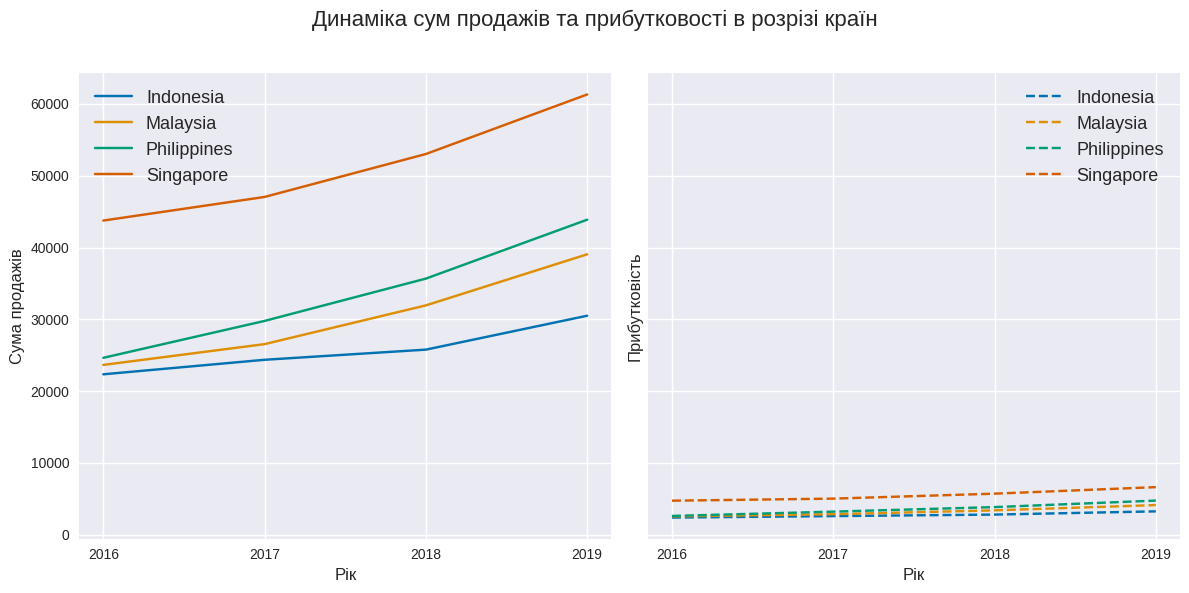

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
fig.suptitle('Динаміка сум продажів та прибутковості в розрізі країн', fontsize=16)

for i, data_pivot in enumerate([countries_year_amount_pivot, countries_year_profit_pivot]):
    ax = axes[i]
    ylabel = 'Сума продажів' if i == 0 else 'Прибутковість'
    
    countries = clean_data['Country'].unique()
    for country, color in zip(countries, colors):
        ax.plot(data_pivot.index, data_pivot[country], 
                label=country, 
                linestyle='--' if ylabel == 'Прибутковість' else '-', 
                color=color)
        
    ax.set_xticks(data_pivot.index)
    ax.set_xlabel('Рік', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.legend(fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.96]);


### Висновок:
Відповідно до отриманих даних можна зазначити, що продажі стабільно зростають з кожним роком, а отже магазини утримують конкурентний рівень на ринку. Найприбутковішим за всі роки бізнес є в Сінгапурі, що можна пояснити кращим соціально-економічним розвитком даного регіону, а також, можливо, за рахунок більшої кількості покупок, ніж в інших регіонах. Це питання ми досліджуватимемо окремо.  

Показник прибутковості також є стабільним з незначним збільшеням за 2019 рік. Отже можемо зробити висновок, що компанія не намагається отримати надприбутки за рахунок збільшення показника профіту, а скоріше робить ставку на залучення більшої кількості клієнтів за рахунок впровадження рекламних та маркетингових кампаній.

### 2.2.наявність залежності кількості здійснених покупок від сезону 

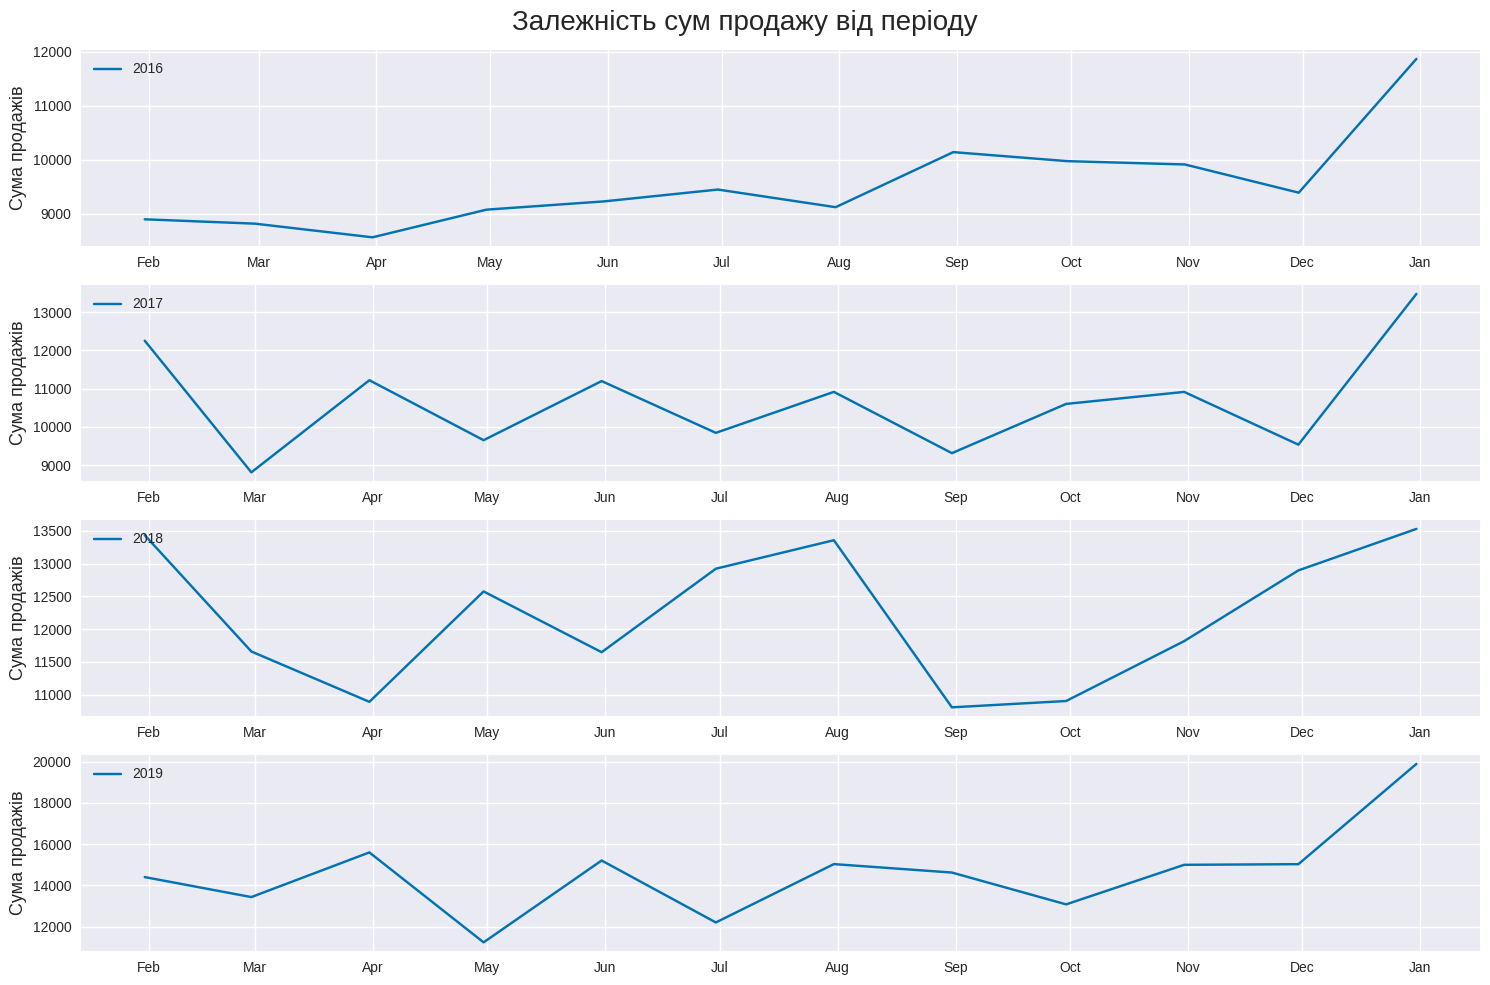

In [22]:
fig, axes = plt.subplots(nrows=clean_data['Year'].nunique(), ncols=1, figsize=(15, 10))
fig.suptitle('Залежність сум продажу від періоду', fontsize=20)

for i, (year, group) in enumerate(clean_data.groupby(['Year'])):
    data = group.resample('M', on='Date')['Amount'].sum()
    ax = axes[i]
    ax.plot(data.index, data.values, label=year[0], color=colors[0])
    ax.set_ylabel('Сума продажів', fontsize=13)
    ax.legend(loc='upper left')
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout();


### Висновок:
Як можемо побачити з графіків, максимальне зростання сум продажів спостерігається виключно у період з грудня по березень. У період з березня по липень в різні роки в одні й ті ж самі місяці є як відчутні зростання, так і спади продажів, з липня по грудень бачимо однакову тенденцію - у серпні продажі спадають, після чого поступово починають зростати аж до піку у січні.
Пікове зростання з грудня по березень може бути пов'язано з більшою кількістю туристів, які прагнуть змінити холодну зиму на тепле літо, а також із святкуванням Китайського нового року.  
Я бачу доцільність у більш детальному аналізі саме тих періодів, де в різні роки є і підвищення і зниженя об'ємів продажів для вирівнювання тенденції, що надасть змогу більш ефективно планувати обсяги закупівлі товарів, необхідність проведення акцій та рекламних компаній.

### 2.3.Розподіл сум продажів по містах

In [23]:
clean_data.groupby('City')['Amount'].sum().round(2).reset_index()


,City,Amount
0,Bedok,135660.89
1,Jakarta,103013.60
2,Kuala Lumpur,121219.35
3,Manila,133987.50
4,Woodlands,69504.90


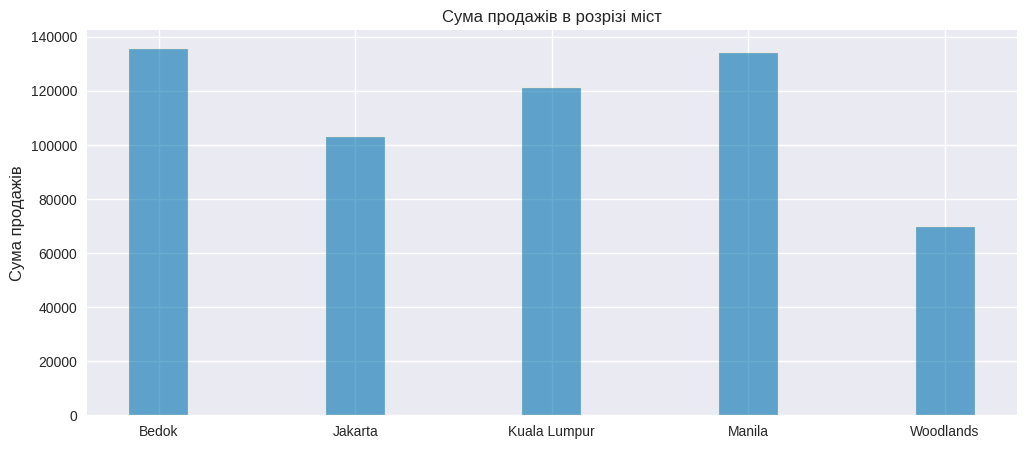

In [24]:
plt.figure(figsize=(12, 5))
plt.bar(x='City', data=clean_data.groupby('City')['Amount'].sum().reset_index(), 
        height='Amount', 
        width=0.3, 
        color=colors[0], 
        edgecolor='khaki',
        alpha=0.6)
plt.title('Сума продажів в розрізі міст')
plt.ylabel('Сума продажів', fontsize=12, loc='center');


- оскільки Woodlands має найнижчий показник, що значно відрізняється від показників всіх інших міст, перевіримо, чи в усі зазначені періоди в цьому місті відбувались продажі. Тобто чи був магазин вже відкритий у 2016 році

In [25]:
sales_per_year_city = clean_data.pivot_table(index='Year', columns='City', values='Amount', aggfunc='sum').reset_index()
sales_per_year_city.style.format("{:.2f}").background_gradient(axis=0)


City,Year,Bedok,Jakarta,Kuala Lumpur,Manila,Woodlands
0,2016.00,29025.07,22349.70,23657.53,24645.93,14736.53
1,2017.00,31410.55,24371.02,26552.39,29783.28,15639.07
2,2018.00,34791.60,25785.22,31946.82,35678.43,18239.08
3,2019.00,40433.67,30507.66,39062.61,43879.86,20890.22


- додатково порахуємо кількість унікальних клієнтів в різних містах

In [26]:
clean_data.groupby('City')['Membership ID'].nunique()


City
Bedok           1258
Jakarta          410
Kuala Lumpur     455
Manila           454
Woodlands        557
Name: Membership ID, dtype: int64

### Висновок:
Отже, за результатами проведеного аналізу маємо такі висновки. Найбільші суми продажів спострерігаються у районі Бедок (Сінгапур) та місті Маніла(Філіппіни). При цьому кількість унікальних клієнтів у Бедок майже втричі переважає аналогічний показник у Манілі. Це може бути пов'язано з великою кількість островів на півдні від Сінгапуру, що входять до складу Індонезії, з яких, вирогідно і прибувають додаткові споживачі товарів. Цікаво, що наступним за кількістю унікальних покупців є район Вудленд (Сінгапур), однак ми бачимо, що саме цей магазин має найменшу суму продажів. Це, в свою чергу, може бути пов'язано з тим, що Вудленд розташований на кордоні з Малайзією. Тобто потік споживачів, який теоритично міг би збільшити суми продажів, продовжує своє переміщення до цетральної частини Сінгапуру. 
Джакарта та Куала Лумпур - це міста з багатомільйонним населенням і значно більшою площею, в порівнянні з Манілою та двома районами Сінгапура. Магазини в цих містах мають практично однакову кількість унікальних споживачів і незначну різницю в продажах. 
Очевидно, що у великих містах присутня більша і жорсткіша конкуренція, ніж на менших територіях. Отже для таких міст як Джакарта, Куала Лумпур та Маніла, я би радила бізнесу зосередитись на рекламних компаніях та запроваджені таких програм лояльності, які б залучили більшу кількість унікальних користувачів і сприяли їх ефективному утриманню.
Для Сінгапуру дієвим способом збільшеня об'ємів продажів може стати розширення торгівельної площі в районі Бедок або в іншому припортовому районі, оскільки потенціал залучення нових клієнтів там доволі великий.

### 2.4.Проведемо статистичний аналіз середньої суми чеку в динаміці по роках

- агрегуємо дані по чеку в динаміці

In [27]:
data_for_stats = clean_data.groupby('Receipt Number').agg({'Amount': ('sum', 'mean')}).round(2).copy()

data_for_stats.columns = ['_'.join(col).strip() for col in data_for_stats.columns]
data_for_stats.reset_index()

data_for_stats = pd.merge(data_for_stats, clean_data.groupby('Receipt Number')['Year'].first(), on='Receipt Number', how='left')

agrigated_data_for_stats = data_for_stats.groupby('Year').agg({'Amount_sum': 'sum', 'Amount_mean': 'mean'})
agrigated_data_for_stats


,Amount_sum,Amount_mean
Year,,
2016,114415.01,11.314670
2017,127756.53,11.164985
2018,146441.30,11.421355
2019,174774.43,11.562915


- розраховуємо різницю значень загальної суми продажів та середньої суми чеку по роках

In [28]:
for col in agrigated_data_for_stats.columns:
    agrigated_data_for_stats[col + '_Diff'] = (agrigated_data_for_stats[col] - agrigated_data_for_stats[col].shift(1))
    agrigated_data_for_stats[col + '_Percent_Diff'] = (((agrigated_data_for_stats[col] - agrigated_data_for_stats[col].shift(1))
                                           / agrigated_data_for_stats[col].shift(1)) * 100).round(2)

agrigated_data_for_stats


,Amount_sum,Amount_mean,Amount_sum_Diff,Amount_sum_Percent_Diff,Amount_mean_Diff,Amount_mean_Percent_Diff
Year,,,,,,
2016,114415.01,11.314670,NaN,NaN,NaN,NaN
2017,127756.53,11.164985,13341.52,11.66,-0.149684,-1.32
2018,146441.30,11.421355,18684.77,14.63,0.256370,2.30
2019,174774.43,11.562915,28333.13,19.35,0.141560,1.24


- за допомогою тесту Манна-Уїтні проведемо аналіз для визначення статистичної значущості збільшення сум продажів по роках

In [29]:
def mannwhitneyu_test(sample1, sample2):
    """
    Perform the Mann-Whitney U test to compare the distributions of two independent samples.

    Parameters:
    - sample1 (array-like): The first sample.
    - sample2 (array-like): The second sample.

    Returns:
    - statistic (float): The Mann-Whitney U test statistic.
    - p_value (float): The two-sided p-value for the hypothesis test.
    """
    statistic, p_value = st.mannwhitneyu(sample1, sample2)
    return statistic, p_value
    

In [30]:
stats_results = {}

for _ in range(data_for_stats.Year.nunique() - 1):
    for year in data_for_stats.Year.unique():
        sample1 = data_for_stats[data_for_stats.Year == year]['Amount_sum']
        sample2 = data_for_stats[data_for_stats.Year == (year + 1)]['Amount_sum']
        if len(sample1) and len(sample2):
            stats_results[f'{year}_{year + 1}'] = mannwhitneyu_test(sample1, sample2)[1]
            
for years, p_values in stats_results.items():
    if p_values < 0.05:
        print(f'Для {years} різниця  є статистично значущою')
    else:
        print(f'Для {years} різниця не є статистично значущою')
        

Для 2016_2017 різниця  є статистично значущою
Для 2017_2018 різниця не є статистично значущою
Для 2018_2019 різниця не є статистично значущою


- розрахуємо, чи є зростання середнього значення продажів на 4% від показника середнього у 2019 році статистично значущим за допомогою t-тесту. 

In [31]:
sales_2019 = data_for_stats[data_for_stats['Year'] == 2019]['Amount_sum']
desired_increase = 0.04
alpha = 0.05

t_stat, p_value = st.ttest_1samp(sales_2019, sales_2019.mean() * (1 + desired_increase))

if p_value < alpha:
    print("Різниця статистично значуща. Є підстави вважати, що збільшення середнього значення на 4% буде значущим.")
else:
    print("Різниця не є статистично значущою. Немає достатніх підстав вважати, що збільшення середнього значення на 4% буде значущим.")
    

Різниця статистично значуща. Є підстави вважати, що збільшення середнього значення на 4% буде значущим.


- за допомогою методу bootstrap проаналізуємо ймовірність збільшення середнього значення продажів у 2020 році на 2% на основі даних за 2019 рік. 

In [32]:
sales_2019 = data_for_stats[data_for_stats['Year'] == 2019]['Amount_sum']

num_iterations = 100000
samples = []

for _ in tqdm(range(num_iterations)):
    sample = np.random.choice(sales_2019, size=len(sales_2019), replace=True)
    samples.append(sample.mean())

confidence_interval = np.percentile(samples, [2.5, 97.5])

probability_increase = np.mean(samples > sales_2019.mean() * (1 + desired_increase))

print(f"Довірчий інтервал: {confidence_interval}")
print(f"Ймовірність зростання на {desired_increase * 100}%: {probability_increase}")


100%|████████████████████████████████| 100000/100000 [00:03<00:00, 26664.14it/s]

Довірчий інтервал: [42.86501435 45.53382086]
Ймовірність зростання на 4.0%: 0.00501


# Висновок:
Впродовж всіх років функціонування бізнесу, спостерігається стійке зростання загальної суми продажів. Попри це, в ході статистичного аналізу було встановлено, що в 2017 році середня сума чеку знизилась на 1.32%, що є значущим показником.  

В свою чергу, навіть при 19 відсотковому збільшенні обсягів продажів у 2019 році порівняно з 2018 роком, цей результат не є статистично значущим, оскільки середнє значення не зазнало значущих змін.  

Чи може бізнес очікувати суттєвого зростання значення середнього чеку без внесення змін у діючі процеси, що впливають на покупців? Ми визначили, що значущим буде збільшення середньої суми продажів хоча б на 4%, в порівнянні з показником у 2019 році.  

Проте, відповідно до наших розрахунків, імовірність досягнення такого показника при незмінних умовах зменшується майже до нуля.  

Отже, для досягнення цієї мети бізнесу слід внести зміни, такі як розширення асортименту, впровадження персоналізованих пропозицій, акцій на додаткові товари (знижка на товар B лише при покупці товару А) та інші стратегії.  

Зокрема, однією зі стратегій може стати продаж товарів, випущених в колаборації з відомими брендами, артистами, аніме тощо. В странах Азії такий підхід є доволі популярним, не дивлячи на більшу вартість в порівнянні з аналогічними "простими" товарами.

### 2.5.Розрахуємо середню цінність клієнта протягом його життєвого циклу(CLV).

- розраховуємо кількість днів життєвого циклу для кожного унікального покупця

In [33]:
customer_lifespan = clean_data.groupby(['Membership ID']).agg({'Date': ('min', 'max')})
customer_lifespan.columns = ['_'.join(col).strip() for col in customer_lifespan.columns]
customer_lifespan = customer_lifespan.reset_index()

customer_lifespan['lifetime_month'] = ((customer_lifespan['Date_max'] - customer_lifespan['Date_min']).dt.days / 30).round()
customer_lifespan.head(5)

,Membership ID,Date_min,Date_max,lifetime_month
0,MIDID0001,2016-01-02,2019-12-24,48.0
1,MIDID0002,2016-01-02,2019-11-11,47.0
2,MIDID0003,2016-01-02,2019-05-15,41.0
3,MIDID0004,2016-01-03,2019-11-03,47.0
4,MIDID0005,2016-01-03,2019-09-22,45.0


- представляємо розподіл значень життєвого циклу

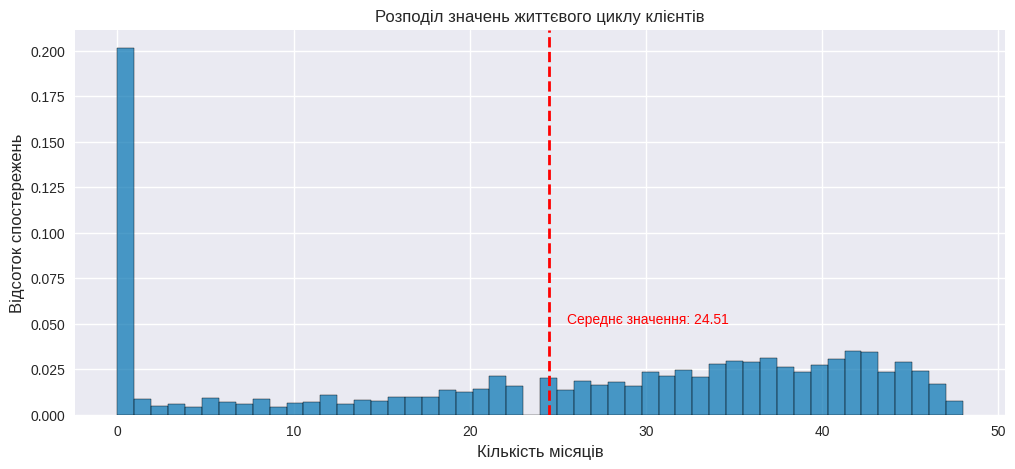

In [34]:
plt.figure(figsize=(12, 5))
sns.histplot(data=customer_lifespan['lifetime_month'], 
             stat='probability', 
             bins=50, 
             color=colors[0], 
             alpha=0.7)

mean_customer_lifespan = customer_lifespan['lifetime_month'].mean()
plt.axvline(x=mean_customer_lifespan, 
            color='red', 
            linestyle='dashed', 
            linewidth=2)
plt.title('Розподіл значень життєвого циклу клієнтів')
plt.xlabel('Кількість місяців', fontsize=12)
plt.ylabel('Відсоток спостережень', fontsize=12, loc='center')
plt.text(mean_customer_lifespan + 1, 0.05, f'Середнє значення: {mean_customer_lifespan:.2f}', color='red');


- розраховуємо середнє значення цінності клієнта
  

In [35]:
purchase_frequency_frame = clean_data.groupby(['Year','Month'])[['Receipt Number', 'Membership ID']].nunique().reset_index(drop=True)
purchase_frequency_frame['frequency_per_month'] = purchase_frequency_frame['Receipt Number'] / purchase_frequency_frame['Membership ID']

In [36]:
purchase_frequency_frame.head(10)

,Receipt Number,Membership ID,frequency_per_month
0,224,212,1.056604
1,212,202,1.049505
2,206,197,1.045685
3,229,218,1.050459
4,216,198,1.090909
5,200,192,1.041667
6,207,201,1.029851
7,239,226,1.057522
8,213,208,1.024038
9,212,201,1.054726


In [37]:
purchase_frequency = purchase_frequency_frame['frequency_per_month'].mean()

average_purchase_value = agrigated_data_for_stats['Amount_mean'].mean()

mean_percent_profit_margin = clean_data['Percent Profit Margin'].mean()

customer_lifetime_value = (purchase_frequency * average_purchase_value * mean_customer_lifespan * mean_percent_profit_margin)
print(f'\
Середня тривалість життєвого циклу: {mean_customer_lifespan:.2f} місяців\n\
Середня вартість покупки: {average_purchase_value:.2f}\n\
Середня частота покупок в місяць: {purchase_frequency:.2f}\n\n\
Середнє значення цінності клієнта: {customer_lifetime_value:.2f}')


Середня тривалість життєвого циклу: 24.51 місяців
Середня вартість покупки: 11.37
Середня частота покупок в місяць: 1.07

Середнє значення цінності клієнта: 31.50


### Висновок:
Результати аналізу свідчать про те, що середня тривалість життєвого циклу клієнтів в мережі магазинів перевищує 2 роки, що є досить обіцяючим і позитивним показником. Враховуючи, що початок досліджуваного періоду, вочевидь, відповідає відкриттю магазинів, можна зробити висновок, що покупці виявили прихильність до даної мережі магазинів.  

Це може бути результатом ефективного управління асортиментом товарів та високого рівня обслуговування. Зазначаючи високий середній показник життєвого циклу, ми можемо припустити, що клієнти вибирають дану мережу не лише одинично, але й залишаються лояльними протягом тривалого періоду.  

Однак, частота здійнюваних покупок в магазині є дуже низькою і складає всього 1 раз на місяць.
Це в свою чергу відображається на значенні цінності клієнта, яке складає 31.5 і є вкрай низьким. Таке значення однієї з важливих метрик підкреслює необхідність впровадження дієвої стратегії залучення та розвитку відносин з кожним клієнтом.  

З рекомендацій для подальшого розвитку можна зазначити:  
- детальний аналіз асортименту товарів для виявлення таких, що не користуються попитом;  
- проведення опитувань на предмет побажань клієнтів щодо асортименту та змін в обслуговуванні, бонусній системі тощо;  
- впровадження нової (або додаткової) програми лояльності для постійних клієнтів.
  

### 2.6.Кількість здійснених покупок протягом дня

In [38]:
clean_data.insert(
                loc=clean_data.columns.get_loc('Time') + 1, 
                column='Hour', 
                value=clean_data['Time'].apply(lambda x: x.hour)
)


In [39]:
hours_sales = clean_data.groupby('Hour')['Receipt Number'].count().reset_index()
hours_sales

,Hour,Receipt Number
0,10,4171
1,11,4022
2,12,4139
3,13,4418
4,14,4042
5,15,4265
6,16,4184
7,17,4036
8,18,4267
9,19,4215


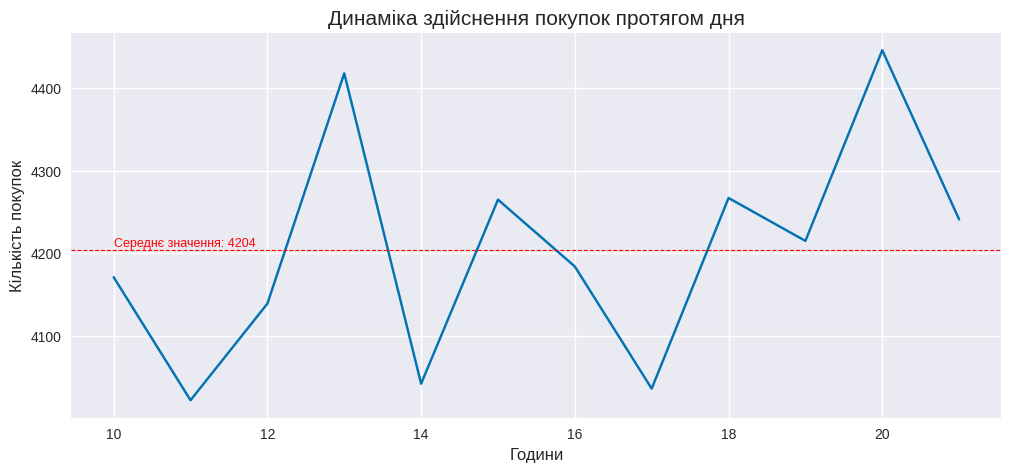

In [40]:
mean_sales = hours_sales['Receipt Number'].mean()
plt.figure(figsize=(12, 5))
sns.lineplot(data=hours_sales,
             x=hours_sales['Hour'], 
             y=hours_sales['Receipt Number'], 
             color=colors[0])
plt.axhline(y=mean_sales, color='red', linestyle='--', linewidth=0.8)
plt.title('Динаміка здійснення покупок протягом дня', fontsize=15)
plt.xlabel('Години', fontsize=12)
plt.ylabel('Кількість покупок', fontsize=12)
plt.text(10, mean_sales + 5, f'Середнє значення: {mean_sales:.0f}', color='red', fontsize=9);


### Висновок:
За результатами аналізу можна стверджувати, що відвідуваність магазину зберігається на стабільному рівні протягом дня з піковими значеннями в години, притаманні сектору продуктових магазинів, а саме: перед початком робочого (навчального) дня, в обід та о 20:00 після закінчення робочого дня.


### 2.7.Розподіл сум продажів за гендером, в тому числі по категоріям продуктів. 

- розподіл сум продажів за гендером

In [41]:
amount_per_gender = clean_data.groupby('Gender').Amount.sum().round(2)
amount_per_gender = pd.merge(amount_per_gender, clean_data.Gender.value_counts(normalize=True), on='Gender')
amount_per_gender


,Amount,proportion
Gender,,
Female,469199.78,0.829025
Male,94186.47,0.170975


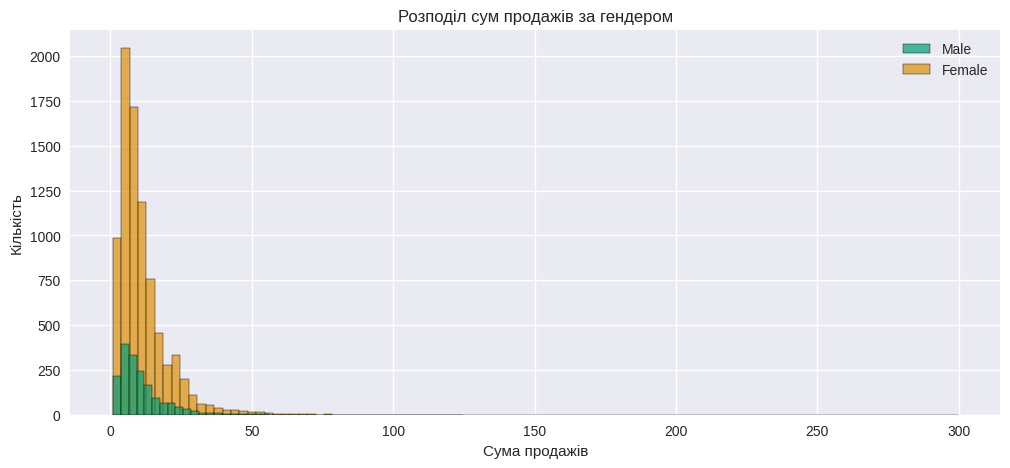

In [42]:
colors_for_gender = {'Male': colors[2], 'Female': colors[1]}

plt.figure(figsize=(12, 5))
sns.histplot(x='Amount', data=clean_data[clean_data['Gender'] == 'Male'], 
             bins=45, 
             weights=0.2, 
             color=colors_for_gender['Male'], 
             label='Male', 
             alpha=0.7, 
             zorder=2
            )
sns.histplot(x='Amount', data=clean_data[clean_data['Gender'] == 'Female'], 
             bins=100, 
             weights=0.2, 
             color=colors_for_gender['Female'], 
             label='Female', 
             alpha=0.7, 
             zorder=1
            )
plt.legend()
plt.xlabel('Сума продажів')
plt.ylabel('Кількість')
plt.title('Розподіл сум продажів за гендером');


- розподіл сум продажів по категоріям товарів, в тому числі в розрізі гендеру

In [43]:
pivot_category = clean_data.pivot_table(index='Category', columns='Gender', values='Amount', aggfunc='sum').round(2).reset_index()
pivot_category


Gender,Category,Female,Male
0,Bakery & Breakfast,44060.89,9101.70
1,Beauty,66111.29,13074.30
2,Beverages,22286.70,4755.36
3,"Choco, Snacks, Sweets",21294.56,4765.52
4,"Dairy, Chilled & Eggs",29445.21,6015.25
5,Frozen,63060.36,11236.36
6,Fruit & Vegetable,30551.57,6231.52
7,Health,17593.10,2820.12
8,Household,20678.23,4537.53
9,Kitchen & Dining,11865.08,2478.66


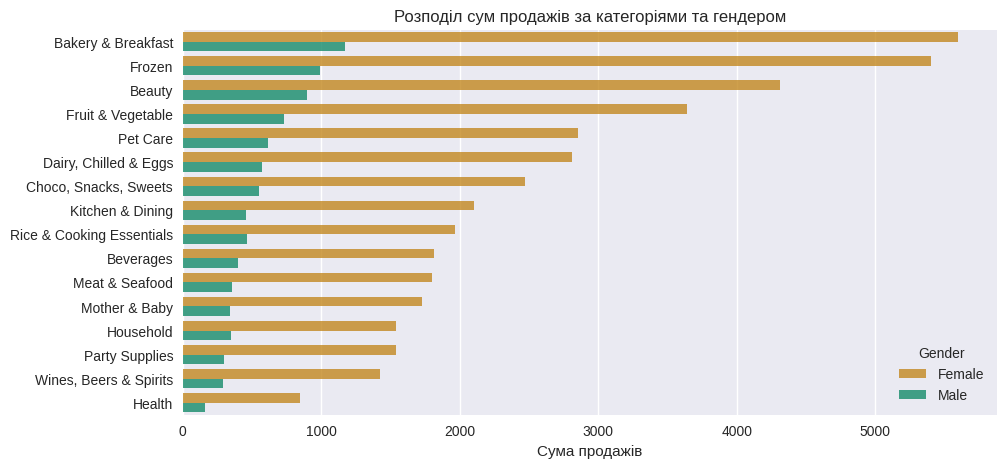

In [44]:
plt.figure(figsize=(10.5, 5))
category_order = clean_data['Category'].value_counts().index
sns.countplot(data=clean_data, 
              y='Category', 
              hue='Gender', 
              dodge=True, 
              palette=colors_for_gender, 
              alpha=0.8, 
              order=category_order)
plt.xlabel('Сума продажів')
plt.ylabel('')
plt.title('Розподіл сум продажів за категоріями та гендером');


### Висновок:
На основі детального аналізу продажів було встановлено, що більше 80% усіх покупок припадає на жінок, і це спостереження є сталим явищем у всіх категоріях товарів, включаючи продукти харчування та інші невеликі товари. Враховуючи, що магазини розташовані в країнах Азії, це може бути наслідком традиційного розподілу обов'язків в структурі сім'ї.  

Враховуючи, що найпопулярнішими категоріями товарів є Сніданки та Заморожені продукти, можемо зробити висновок, що покупці намагаються скорочувати час приготування їжі, а також зменшувати частоту відвідувань магазину, шляхом придбання більшої кількості заморожених продуктів. Скоріше за все, це може бути наслідком того, що окрім традиційного догляду за сім'єю, жінки так само як і чоловіки мають роботу або навчаються.  

Вважаю за доцільне розглянути можливість створення онлайн покупок в мережі магазинів з доставкою додому. Як показує особиста практика, це також значно збільшує середній чек покупки, оскільки не має потреби обмежувати покупку по об'єму або вазі.  


### 2.8.Віковий розподіл покупців.

In [45]:
age_grouped_data = clean_data.groupby('Age')['Receipt Number'].nunique().reset_index()
age_grouped_data


,Age,Receipt Number
0,15,257
1,16,376
2,17,394
3,18,419
4,19,408
...,...,...
56,71,52
57,72,44
58,73,31
59,74,40


- для зручності подальшого аналізу, введемо вікові групи та візуалізуємо розподіл цих груп

In [46]:
clean_data.Age.unique().min()
age_bins = [i for i in range(clean_data.Age.unique().min(), clean_data.Age.unique().max() + 1, 10)]

labels = []
for i in range(len(age_bins) - 1):
    labels.append(f'від {age_bins[i]} до {age_bins[i + 1]}')

clean_data['AgeGroup'] = pd.cut(clean_data['Age'], bins=age_bins,right=False, labels=labels)


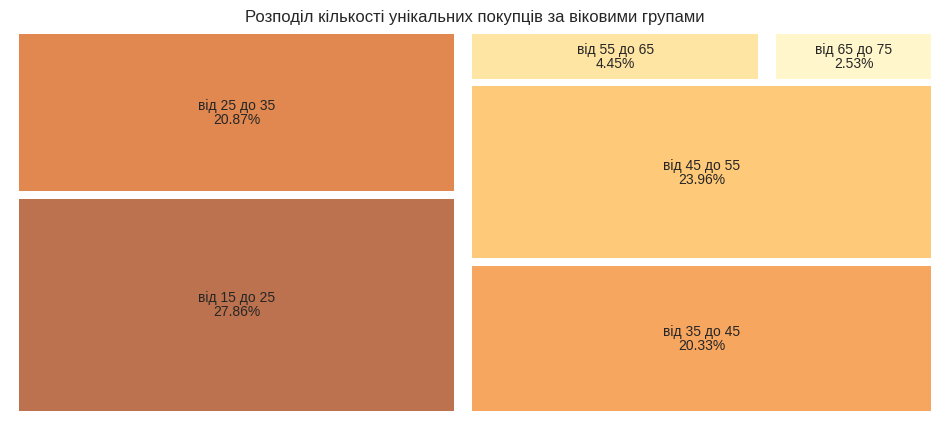

In [47]:
agegroup_data = clean_data.groupby('AgeGroup')['Receipt Number'].nunique().reset_index()
agegroup_data['Percent'] = (agegroup_data['Receipt Number'] / agegroup_data['Receipt Number'].sum() * 100).round(2).astype(str) + '%'

sizes = agegroup_data['Receipt Number']
value = agegroup_data['Percent']
palette = sns.color_palette("YlOrBr")[::-1]

plt.figure(figsize=(12, 5))

squarify.plot(sizes=sizes, 
              value=value, 
              label=agegroup_data['AgeGroup'], 
              color=palette, 
              pad=True, 
              bar_kwargs={'alpha':.7}, 
              text_kwargs={'fontsize':10}
             )
plt.title('Розподіл кількості унікальних покупців за віковими групами')
plt.axis('off');


### Висновок:
Віковий розподіл показав, що значну частину становлять клієнти у віці від 15 до 55 років з незначної різницею між віковими категоріями. Це дозволяє зробити висновок, що асортимент продукції на достатньому рівні відповідає запиту від споживачів різних вікових груп.

Оскільки середня тривалість життя в досліджуваних країнах, відповідно до відкритих джерел інформації, складає 70 - 77.5 років, дана категорія людей може складати значну долю серед потенційних покупців. 

Однією із можливих стратегій залучення зазаначеної категорії людей може бути покращення інфраструктури магазинів (підходів, місць для відпочинку тощо), залучення персоналу до допомоги літнім людям в підборі необхідних продуктів та здійсненні покупок загалом.

### 2.9.Топ 15 найпопулярніших товарів

In [48]:
most_popular_goods = (clean_data.pivot_table(index='Items', values='QTY', aggfunc='sum')
                      .sort_values(by='QTY', ascending=False)
                      .reset_index()
                      .head(15))
most_popular_goods


,Items,QTY
0,Sainsbury salted tortilla chips,1314
1,Ashai Lager Beer,1240
2,Anchor salted pure butter,1017
3,Nutro Beef with vegetables dog food,992
4,Lamb pate dog food,991
5,Fresh Soyamilk,991
6,Alpo Chicken pate dog food,983
7,Original wholemeal bread,957
8,PEDIGREE Adult complete nuritition dog food,952
9,3 in 1 cereal drink original,768


### Висновок:
Найпопулярнішими, з суттєвим відривом від інших, є чипси та пиво. Це доволі логічно, оскільки раніше ми виявили, що найбільш чисельною категорією споживачів за віком є молодь від 15 до 25 років.  
 
Із цікавого, серед 15 топ продуктів бачимо 4 позиції корму для собак. З цього можемо зробити висновок, що домашні улюбленці є розповсюдженим явищем на досліджуваних територіях і розширення асортименту товарів для собак може бути гарним інструментом для підвищення середнього чеку покупки. Також, як одну із стратегій майбутнього розвитку, можна запропонувати бізнесу колаборацію з ветиринарними клініками та/або грумінговими компаніями (при купівлі товарів категорії 'Pet Care' діють знижки на послуги зазначених партнерів).  


### 2.10.Порівняння товарів найпопулярнішої категорії 'Bakery & Breakfast' різних брендів за весь час на: популярність серед покупців, маржинальність, продуктові витрати

In [49]:
category_frame = clean_data[clean_data['Category'] == 'Bakery & Breakfast'].copy()

result = category_frame.groupby('Brand')[['QTY', 'Amount', 'Product Cost', 'Profit Margin']].sum()

result = result[(result > 0).any(axis=1)]
result.sort_values(by='QTY', ascending=False).round(2).head(10)


,QTY,Amount,Product Cost,Profit Margin
Brand,,,,
BonJour,1667,10371.85,8130.98,955.65
RedMart,697,3485.53,2621.19,433.14
Gardenia,662,3269.67,2456.28,407.33
Sunshine,644,3170.84,2409.59,365.54
Adams,463,2167.09,1567.91,330.56
St Michel,344,1658.59,1272.59,179.36
QUAKER,337,1810.35,1375.55,213.06
Cowhead,311,1530.49,1162.21,180.02
St Pierre,300,1267.19,973.01,137.14


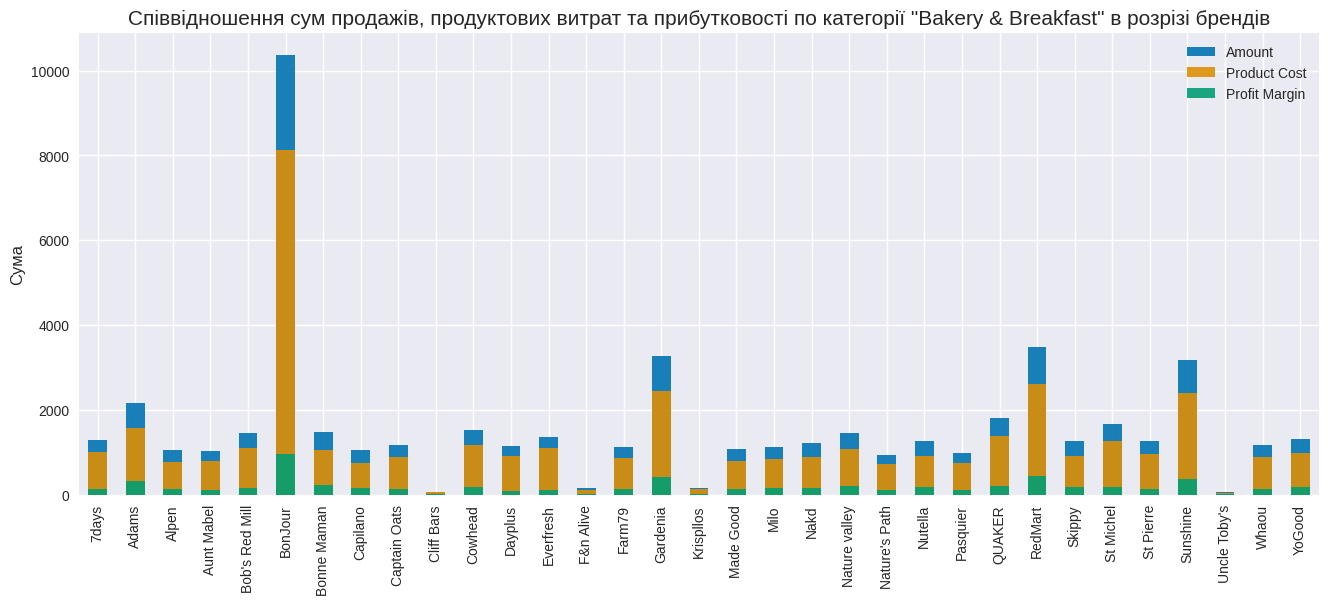

In [50]:
fig, ax = plt.subplots(figsize=(16, 6))
indexes = result.columns[1:]
for ind, color in zip(indexes, colors):
    result[ind].plot(kind='bar', 
                     stacked=True, 
                     ax=ax, 
                     bottom=0, 
                     label=ind, 
                     color=color, 
                     alpha=0.9)
plt.xlabel('')
plt.ylabel('Сума', fontsize=12)
plt.title('Співвідношення сум продажів, продуктових витрат та прибутковості по категорії "Bakery & Breakfast" в розрізі брендів', 
         fontsize=15)
plt.legend();


### Висновок:
Здійснений аналіз показав чіткі тенденції в продажах товарів у різних брендів в даній категорії. Деякі бренди виявилися беззаперечними лідерами, в той час як інші мають невелику популярність серед покупців. Однак поза цими екстремумами лояльність споживачів розподілена відносно рівномірно між різними брендами.  

Додатково, важливо відзначити, що на фоні усіх розглянутих брендів вирізняється стабільний рівень маржинальності, оскільки витрати на продукцію завжди залишаються на нижчому рівні порівняно із сумами продажів. Це свідчить про ефективний та професійно організований процес формування маржинальності в компанії.  

З урахуванням виявлених тенденцій та аналітичних висновків, рекомендації для бізнесу включають перегляд доцільності співпраці з брендами, які мають низькі обсяги продажів. Такий підхід може дозволити перерозподілити ресурси, спрямовані на менш вдалий асортимент, на співпрацю з іншими, більш популярними серед покупців брендами, з метою оптимізації стратегії закупівель та максимізації прибутковості.  

### 2.11.Визначення топ 5 найменш прибуткових товарів в кожній підкатегорії

In [51]:
goods_profit = clean_data.groupby('Items')[['QTY', 'Profit Margin']].sum().reset_index().sort_values(by='Profit Margin')

group = clean_data.groupby('Items')['Sub_Category'].first()

goods_profit_for_subcategory = pd.merge(goods_profit, group, on='Items', how='left')
goods_profit_for_subcategory.reset_index(drop=True, inplace=True)

for subcat in goods_profit_for_subcategory['Sub_Category'].unique():
    subcat_goods_profit_for_subcategory = (goods_profit_for_subcategory[goods_profit_for_subcategory['Sub_Category'] == subcat]
                                           [['Items', 'QTY', 'Profit Margin']])
    median_profit = subcat_goods_profit_for_subcategory['Profit Margin'].median().round(2)
    display(subcat.upper(), f'Profit median: {median_profit}', subcat_goods_profit_for_subcategory.set_index('Items').head(5))
    print('_' * 60)
    

'OATMEALS'

'Profit median: 2.52'

,QTY,Profit Margin
Items,,
raisin brain breakfast cereal,1,0.12426
100-Percent whole grainn rolled oats,2,0.23256
quick cook oatmeal tin,2,0.28272
Thick rolled whole grain oats,1,0.47880
instant oats,2,0.65892


____________________________________________________________


'CEREAL & PROTEIN BARS'

'Profit median: 3.29'

,QTY,Profit Margin
Items,,
F&N chocolate and nut muesli bar,1,0.1495
Clif Bar cranberry and mango muesli,1,0.1729
Alpen light salted caramel,1,0.3367
Alpen light double chocolate bar,2,0.4108
made good organic granola bar chocolate chip,2,0.4394


____________________________________________________________


'FRESH BREAD'

'Profit median: 2.09'

,QTY,Profit Margin
Items,,
German multigrain roll,1,0.15525
wholewheat toasted bread,2,0.20100
Belgian chocolate bread,2,0.30600
milk and chocolate cream bread,2,0.44250
chocolate and cookies wholemeal soft bun,2,0.46050


____________________________________________________________


'BATH & BODY'

'Profit median: 148.72'

,QTY,Profit Margin
Items,,
stress relief moisturizing lotion,1,0.40232
ocean fragnance handwash,3,1.74746
Go fresh revive body wash,3,2.19960
Anti backteria body wash refill pack,4,3.33136
Anti backteria foaming body wash,8,4.40672


____________________________________________________________


'JAMS, HONEY & SPREADS'

'Profit median: 3.13'

,QTY,Profit Margin
Items,,
peanut butter spread,1,0.41736
cranberry with blueberry spread,1,0.46472
intense strawberry jam,1,0.66008
korean honey citron tea concentrate,1,1.12924
natural peanut butter spread,1,1.17808


____________________________________________________________


'SLICED BREAD'

'Profit median: 4.8'

,QTY,Profit Margin
Items,,
softmeal bread,3,0.52704
rice and oat soft grain bread,4,0.61056
low sugar white bread,1,0.61200
original wholemeal bread,1,0.63072
Wheat soft grain loaf slice bread,4,0.84096


____________________________________________________________


'PASTRIES & TREATS'

'Profit median: 3.48'

,QTY,Profit Margin
Items,,
chocolate croissant,3,0.74970
fresh cinnamon,2,0.91560
croissants spelt and quinoa,4,1.08360
fresh pain AU chocolate,3,1.50255
strawberry crepes,6,1.58130


____________________________________________________________


'CHOCOLATE, MALT & HOT CEREALS'

'Profit median: 12.78'

,QTY,Profit Margin
Items,,
Coco powder,2,0.84132
cadbury 3 in 1 hot chocolate drink,7,5.45382
Green & black organic cocoa powder,12,12.77560
3 in 1 cereal drink oats,23,23.86282
3 in 1 cereal drink original,768,566.43058


____________________________________________________________


'CHAMPAGNE & SPAKLING WINE'

'Profit median: 6.73'

,QTY,Profit Margin
Items,,
Wolf Blass Yellow label champage,1,1.62876
Bottega Brut Champagne,2,4.59816
Rothschild Cuvee brut champagne,2,6.73176
Villa Sandi imperial champagne,3,9.32316
Bollinger Pink platted moscato rose,8,26.23488


____________________________________________________________


'WHITE WINE'

'Profit median: 7.17'

,QTY,Profit Margin
Items,,
Oyster Bay Chardonnay tropical flavour white wine,2,2.5305
Upside Down Hill chardonnay white wine,2,4.1118
Refereshing sauvignon blanc white wine,3,6.4512
Beringer Sauvignon blanc 2019,4,7.8897
Gran Mar Sauvignon blanc white wine,4,9.0384


____________________________________________________________


'LITTER & TOILET'

'Profit median: 7.07'

,QTY,Profit Margin
Items,,
Cat lemon fresh cat litter,2,2.59284
Cat lavender cat litter,2,2.91510
Arm & hammer Ultra odor control cat litter,8,11.22006
Sumo Cat Double duty advanced cat litter,12,18.22368


____________________________________________________________


'ROSE & DESSERT WINE'

'Profit median: 8.12'

,QTY,Profit Margin
Items,,
Matua Valley Marlborough rose wine,2,3.33564
World's CellarGrigio blush rose wine,3,4.90842
Pink moscato wine,5,8.05860
Long Flat Zinfandel rose wine,5,8.12460
Reserve rose wine,6,10.07028


____________________________________________________________


'RED WINE'

'Profit median: 14.56'

,QTY,Profit Margin
Items,,
Penfolds Pinot noir red wine,1,3.47872
Grant burge Red blend bold red wine,2,6.87680
Oyster Bray Shiraz blackcurrant flavour red wine,4,14.55552
Bringer Sauvignon smooth red wine,5,16.93440
19 Crimes Pinot noir wine,11,35.80640


____________________________________________________________


'LAUNDRY'

'Profit median: 7.89'

,QTY,Profit Margin
Items,,
Vanish liquid detergent refill,6,4.43079
Super color liquid detergent refill,10,6.37728
Comfort Low suds powder detergent,11,7.83419
regular laundry detergent,10,7.95249
Fresh fabric softener refill,13,9.84893


____________________________________________________________


'FEEDING & NURSING'

'Profit median: 6.32'

,QTY,Profit Margin
Items,,
Kodomo Disposable baby bibs,6,4.92888
RedMart Powder milk container,6,5.61440
Sainsbury's Straw brush,7,5.93824
Pigeon Canister baby wipes,10,6.71088
Pigeon Sterilizing tablets,17,13.80720


____________________________________________________________


'JUICES & COCONUT WATER'

'Profit median: 58.74'

,QTY,Profit Margin
Items,,
Nakd coco pop cereal bar pack,7,5.00496
ceres pineapple 100% juice,94,49.35823
ceres whispers of summer 100% juice,103,49.92773
UFC Referesh 100% natural coconut water,120,58.74024
ceres apple 100% juice,125,63.74916


____________________________________________________________


'OIL'

'Profit median: 15.97'

,QTY,Profit Margin
Items,,
Harmuni Virgin olive oil,5,6.708
Naturel Canola and sunflower oil,5,7.788
Borges Premium cooking oil,11,14.890
Golden Pure olive oil,12,17.055
Knife Pure white sesame oil,13,18.462


____________________________________________________________


'MINTS'

'Profit median: 8.01'

,QTY,Profit Margin
Items,,
Eclipse Sugarfree peppermint Mints,59,7.9680
Exclipse Sugarfree Spearmint Mints,58,8.0082
Mentos Mint Bag 50s Chewy Deagees,79,10.7694


____________________________________________________________


'PAPER'

'Profit median: 12.74'

,QTY,Profit Margin
Items,,
facial tissue,19,8.10405
Onwards Skin cleansing wipes,25,11.25432
Facial tissues Flora,27,12.06081
Facial tissue soft pack,31,13.42236
Dettol Anti-backteria wet wipes,36,15.42945


____________________________________________________________


'MUSHROOMS'

'Profit median: 10.88'

,QTY,Profit Margin
Items,,
Shiitake mushroom,48,8.93700
Buyer's Choice Swiss brown mushrooms,54,10.24920
White button mushrooms,52,10.30104
Fungo Organic King Oyster mushroom,60,11.45286
Green Piece Brown shimeiji mushrooms,60,11.53440


____________________________________________________________


'DISPOSABLE TABLEWARE'

'Profit median: 327.71'

,QTY,Profit Margin
Items,,
Lian Teck Biodegradable disposable,16,9.12744
Biogreen Biodegradable round plate,555,296.23356
Millenium Horse Disposable clear plastic,552,324.72972
Millenium Horse Disposable paper plate,571,330.69582
Liang Teck Disposable foam cups,565,332.09316


____________________________________________________________


'RICE'

'Profit median: 21.32'

,QTY,Profit Margin
Items,,
Okome Short grain rice,5,9.23220
Royal Umbrella Japonica rice,9,16.21960
PaddyKing Fragrant rice,11,17.17180
Songhe Mixed brown and red rice,15,25.45985
Gallo Natural organic brown rice,17,28.78335


____________________________________________________________


'CHILLED JUICES & DRINKS'

'Profit median: 14.73'

,QTY,Profit Margin
Items,,
Nutriwell chrysanthemum with wolfberry,24,11.70815
Nutriwell barley,24,13.12380
Nutriwell snow fungus with wolfberry tea,27,14.13350
Marigold peel fresh no sugar added juice,34,15.32030
kagome tomato juice,34,17.94575


____________________________________________________________


'MEDICAL SUPPLIES'

'Profit median: 19.56'

,QTY,Profit Margin
Items,,
Poise Cough and cold for cough cold and flu relief,24,12.40416
Menthol cough Lozenges,25,13.04313
Nurofen Mouthwash,34,15.60786
Strepsils Extra pain relief for strong headache,44,23.50442
Panadol Cap limau yu yee medicated oil,53,28.71235


____________________________________________________________


'SWEETS'

'Profit median: 23.31'

,QTY,Profit Margin
Items,,
yupi happy bears candy,37,13.4205
lot 100 assorted fruit gummy,46,19.5975
Chupa chups best of lollipops,48,22.4805
Rocky mountain classic marshmallows,57,24.1350
Haribo goldbears gummy candy multipack,53,25.2120


____________________________________________________________


'BUTTER & MARGARINE'

'Profit median: 14.67'

,QTY,Profit Margin
Items,,
SCS spreadable butter,54,13.51924
SCS unsalted butter foil wrap,54,14.11178
Anchor Unsalted pure butter,56,14.59567
Buttercup unsalted luxury spread,57,14.75149
snow neo soft spread,57,15.01490


____________________________________________________________


'ADULT DIAPERS & INCONTINENCE'

'Profit median: 17.99'

,QTY,Profit Margin
Items,,
Certainity Adult care fil diapers,14,14.27644
Depend plus unisex adult diapers,16,14.89010
Certainty value M18 adult diapers,17,16.73840
Lifree Powerfull thin pants,19,19.24428
Tena Adult diapers,24,23.40692


____________________________________________________________


'NOODLES & VERMICELLI'

'Profit median: 28.98'

,QTY,Profit Margin
Items,,
Mamee Noodle chicken,107,18.43095
Paldo Seafood flavour cup noodles,159,26.76910
Special instant noodles,177,28.54560
Koka Egg noodles,169,29.40725
Nissin Curry noodles,184,31.43930


____________________________________________________________


'FRESH MILK'

'Profit median: 26.38'

,QTY,Profit Margin
Items,,
Plain soyamik,37,20.65681
PowerBeans fresh soya milk,33,21.37878
Omega Soyamilk,38,23.47169
Cultured Milk,51,29.27957
Soya Milky Lite,61,39.96458


____________________________________________________________


'CHEESE'

'Profit median: 27.84'

,QTY,Profit Margin
Items,,
Lemnos Haloumi cheese,31,21.29330
Traditional shredded cheddar cheese,36,24.79519
Paysan breton brie cheese,42,27.69193
Cowhead slice cheddar cheese,37,27.99517
Philadelphia cream cheese block,41,28.13349


____________________________________________________________


'BABY WIPES'

'Profit median: 25.92'

,QTY,Profit Margin
Items,,
Tena wet wipes,39,21.91540
Pampers Gentle care baby wipes,39,23.01065
Huggies Sensitive wipes,39,23.47930
MamyPoco Pure Clean wipes,49,28.35430
Cloversoft Clean care baby wipes,54,31.05375


____________________________________________________________


'NUTS, PEAS & SEEDS'

'Profit median: 29.4'

,QTY,Profit Margin
Items,,
Nature's wonders baked usa walnuts,92,25.06497
Redmart pine nuts,100,28.10865
Nature wonders baked macadamias,123,29.39640
camel roasted cashews,111,30.75912
camel natural pistachios,103,33.14490


____________________________________________________________


'CLEANING SUPPLIES'

'Profit median: 33.11'

,QTY,Profit Margin
Items,,
Arm & Hammer Fridge N Freezer baking soda,132,25.11246
Colorox Wiper dry sheet value pack,149,29.39009
Haevy duty scrub sponge value pack,134,29.62700
Aromatic lavender floor cleaner,180,36.59597
Harpic lavender fresh active cleaning gel,170,37.61145


____________________________________________________________


'OVER THE COUNTER MEDICATIONS'

'Profit median: 74.14'

,QTY,Profit Margin
Items,,
Strawberry Flavour pain and fever relief,22,25.54028
Po Chai Hot remedy cold and flu for early cold,27,30.79574
optrex eye drops,56,68.60134
Tiger balm white ointment,70,79.67212
Cold relief for fever and blocked nose,69,81.70172


____________________________________________________________


'CAT FOOD & TREAT'

'Profit median: 29.36'

,QTY,Profit Margin
Items,,
Fancy Feast chicken and turkey gourmet cat food,22,25.74150
Nutro One Party mix original crunch cat treat,25,26.23275
IAMS Lovers chicken feast cat food,27,26.47772
SHEBA Chicken feast gourmet cat food,33,32.24958
Whiskas Fillet and shirasu wet cat,39,35.59008


____________________________________________________________


'KITCHEN SUPPLIES'

'Profit median: 26.03'

,QTY,Profit Margin
Items,,
Lottermart Soup and salad containers and lids,105,26.02518


____________________________________________________________


'FRESH VEGETABLES'

'Profit median: 113.52'

,QTY,Profit Margin
Items,,
N&P White radish,98,28.34135
K- Fresh Japanese sweet potato,124,33.64235
Givvo old ginger,134,42.34720
YUVVO French Bean,605,184.69805
Oraganic 4 Life Red onions,570,187.15665


____________________________________________________________


'ICED TEA'

'Profit median: 45.63'

,QTY,Profit Margin
Items,,
heaven earth and jasmine tea,24,28.6845
hsc oldenlandia,37,42.3780
yeo grass jelly drink,37,45.1020
pokka jasmine green tea,38,46.1565
Pokka no sugar oolong tea,43,55.8315


____________________________________________________________


'SALT & SEASONING'

'Profit median: 40.8'

,QTY,Profit Margin
Items,,
Maldon White pepper powder,108,29.08672
Lee Kum Kee Cooking sea salt,134,33.29152
Saxa Sea salt,151,39.37024
Knorr Chicken powder,146,42.23936
Morton Fine salt,148,43.46944


____________________________________________________________


'FROZEN MEAT'

'Profit median: 81.17'

,QTY,Profit Margin
Items,,
Sadia beef minced,80,32.51900
Sulina Minced Pork,87,37.62780
Midamar Valley Chef Chicken Franks,99,44.41804
Food Crumz Pork belly sukiyaki,109,46.14040
Norbest Boneless chicken breast,106,46.44420


____________________________________________________________


'HOME BAKING & SUGAR'

'Profit median: 41.79'

,QTY,Profit Margin
Items,,
GPA Fine textured brown sugar for cooking,136,34.03818
Pagoda Fine grain white sugar for everyday use,129,35.42121
Native Natural granulated raw sugar,156,39.99303
SIS all purpose plain flour,165,43.59168
Bake King Buttermilk pancake mix,191,48.02985


____________________________________________________________


'BERRIES'

'Profit median: 59.76'

,QTY,Profit Margin
Items,,
USA strawberries,50,38.22150
Buyer's Choice Blueberries,76,49.98260
Driscoll's Blackberries,83,57.60200
Ozblu Raspberries,86,59.76249
RedMart USA strawberries,78,60.07125


____________________________________________________________


'COFFEE'

'Profit median: 75.82'

,QTY,Profit Margin
Items,,
Deluxe coffee,82,39.49519
redmart ground coffee,106,66.49935
Nescafe Gold pure coffee,115,72.38096
Redmart coffee beans,136,79.25318
Qualita rossa ground coffee,118,81.21542


____________________________________________________________


'FRESH FRUIT'

'Profit median: 54.81'

,QTY,Profit Margin
Items,,
Prime Asia Valencia oranges,93,42.63027
Sumifru Gala Apples,112,53.11230
YOVVO Green seedless grapes,116,53.57730
Redmart Seedless grapes,123,56.03901
Envy Red apples,123,57.25824


____________________________________________________________


'SPORTS & ENERGY DRINKS'

'Profit median: 55.33'

,QTY,Profit Margin
Items,,
Pocari sweat Ion Water,65,44.20026
Monster ultra red sugar free energy drink,77,48.90444
Pocari sweat ION supply drink,68,52.96512
100PLUS Isotonic Drink,89,57.70050
100PLUS Zero Sugar,92,61.82202


____________________________________________________________


'BABY & TODDLER FOOD'

'Profit median: 79.96'

,QTY,Profit Margin
Items,,
Gerber 1st foods prunes,42,52.68912
Organix Apple juice,50,65.82576
Kewpie Organic green yoghurt,77,78.01992
PediaSure organic animal biscuits,78,81.90600
Heinz Graduates puffs cereal snack strawberry apple,67,87.98856


____________________________________________________________


'TEA'

'Profit median: 65.06'

,QTY,Profit Margin
Items,,
Dilmah Camomile Tea,61,55.35327
Twinings Pure Peppermint Tea,67,62.48872
Lipton 3-In-1 Earl Grey Milk Tea Latte,74,64.23368
Super 3-in-1 Original Mil Tea,72,65.89618
OSK 100% Japanese Green Tea,71,69.08951


____________________________________________________________


'PASTA'

'Profit median: 62.65'

,QTY,Profit Margin
Items,,
Colavita Pasta panne rigate,116,56.21664
Agnesi Pasta spaghetti,119,60.33468
Barila Pasta Fusilli,118,61.41720
Kraft Pasta penne,128,63.87860
Divella Pasta Rigatoni,136,69.44620


____________________________________________________________


'VITAMINS & SUPPLIMENTS'

'Profit median: 69.43'

,QTY,Profit Margin
Items,,
H-two original isotonic drink,65,59.51237
Ensure life HMB vanilla,61,59.83888
Monster Energy drink,72,68.69173
Ultra violet energy drink,65,70.15845
Triple care milk powder,113,115.79054


____________________________________________________________


'LETTUCE & SALADS'

'Profit median: 72.01'

,QTY,Profit Margin
Items,,
Givvo Local Tomatoes,169,61.7532
Dicky Bill Chinese parsley coriander fresh herbs,163,69.0468
Givvo celery,171,71.2848
Selezeone Oro Iceberg Lettuce,184,72.7404
ThyGrace Romanine lettuce,645,238.6884


____________________________________________________________


'SNACKS'

'Profit median: 79.88'

,QTY,Profit Margin
Items,,
Monde Pola snack,108,64.33740
camel strip muruku,102,71.50863
sun-maid natural california raisins,120,79.83864
Orville Redenbacher's Butter Flavor chips,133,79.92420
Tostitos medium chunky salsa,121,80.49894


____________________________________________________________


'DELI & COOKED MEAT'

'Profit median: 77.05'

,QTY,Profit Margin
Items,,
Chicken Ham,186,68.90100
Smoked Bratwurst Sausages,168,69.79044
Honey Baked ham deli meats,196,76.48028
Straky Bacon,179,77.61724
Danish Bacon bits,198,84.67088


____________________________________________________________


'PET FOOD'

'Profit median: 89.74'

,QTY,Profit Margin
Items,,
Greenies Adult complete nutritions chicken food,112,69.09236
Fancy Feast Adult complete nutritions Beef and vegetable pet food,129,84.01648
Temptations Chinky chicken feast gourmet cat food,149,89.61464
Pedigree Chicken and turkey gourmet cat food,138,89.87000
Alpo Lamb pate dog food,163,99.21040


____________________________________________________________


'EGGS'

'Profit median: 102.05'

,QTY,Profit Margin
Items,,
Soya corn with omega 3 and vitamin E,162,86.71131
Fresh Eggs with Omegs,183,89.67429
Fresh Eggs,187,101.18520
Brown organic feed fresh Eggs,203,102.91617
Fresh Egss with organic selenium,211,112.34700


____________________________________________________________


'CIDER'

'Profit median: 97.91'

,QTY,Profit Margin
Items,,
Somersby Apple cider gold,116,86.79846
Kingstone Press Korean orange flavour cider,107,87.20507
Red berries and lime cider,119,90.88354
StrongBow Apple cider gold,122,97.91344
MerryDown Original cider,143,124.77744


____________________________________________________________


'BABY TOILETRIES'

'Profit median: 116.66'

,QTY,Profit Margin
Items,,
Johnson's Baby daily moisture lotion,123,87.05256
Aveeno Baby laundry detergent nature care refill,135,103.56696
Cetaphil Baby shampoo with natural camomile,155,108.48012
Kodomo Baby gentle wash and shampoo,177,124.83324
Tollyjoy Baby Milk + Rice Bath,179,150.96060


____________________________________________________________


'DISHWASHING'

'Profit median: 126.74'

,QTY,Profit Margin
Items,,
Somat Natural lemon fragrance,113,91.05718
Lemon dishwasher tablets,157,109.08248
Ajax Kim poh dishwashing liquid,164,124.52668
Clean & Fresh Lemon gold dishwashing liquid,181,128.96331
UIC big value Natural Aniti backteria,187,142.91874


____________________________________________________________


'FROZEN FRUITS'

'Profit median: 190.08'

,QTY,Profit Margin
Items,,
Whole korean strawberry,163,93.52074
Blueberries and strawberry,174,94.30104
Oraganic acai berry,163,98.59881
Organic mixed berries fruits,216,132.66579
Sujon Korean strawberry fruits,87,178.69467


____________________________________________________________


'ICE CREAM'

'Profit median: 106.99'

,QTY,Profit Margin
Items,,
Chornetto Chocolate ice cream,109,96.19728
Picard Nut ice cream,117,105.95568
Lotte Almond white ice cream,129,106.75925
Mint Ice Cream,115,107.22470
Magnum Almond Ice cream,122,109.55088


____________________________________________________________


'BISCUITS & CRACKERS'

'Profit median: 116.13'

,QTY,Profit Margin
Items,,
Hup seng special cream crackers,154,98.7390
Want want senbei rice crakers,158,103.5375
Meiji plain crackers with oat,184,115.6440
Hup seng cream crackers,186,116.6145
Oreo mini oreo sharepack,217,142.8705


____________________________________________________________


'BABY LAUNDRY & CLEANING'

'Profit median: 136.84'

,QTY,Profit Margin
Items,,
Kodomo Baby laundry softener refill pack,91,102.18928
Baby laundry detergent extra care refill,105,118.48110
Antibacteria baby accessories and vegetable,118,135.72415
Tollyjoy Baby laundry detergent low studs refill pack,129,137.94975
Seventh Generation Laundry detergent nature care refill,141,147.86330


____________________________________________________________


'SPORTS NUTRITION'

'Profit median: 164.17'

,QTY,Profit Margin
Items,,
Barr-irn Bru sufar free,59,102.46572
Monster Energy Drink,78,153.19080
Monster Ultra violet energy drink,87,175.14924
H-two-O original isotonic dring-case,107,198.59700


____________________________________________________________


'AIR CARE'

'Profit median: 124.53'

,QTY,Profit Margin
Items,,
Ocean escape air freshner,94,103.37920
Lavender Air freshner,98,109.00480
AMBI PUR Dehumidifier,96,113.05344
Hakugen Lemon air freshner,111,136.01024
Fresh Lavender Fragrance beads,111,137.42592


____________________________________________________________


'FROZEN VEGETABLES'

'Profit median: 303.08'

,QTY,Profit Margin
Items,,
Riced Cauliflower,150,115.64116
Baby peas,243,130.51744
Sweet Corn,515,275.87272
Chopped spinach,602,330.29260
Green peas,557,333.03672


____________________________________________________________


'CHOCOLATE'

'Profit median: 143.89'

,QTY,Profit Margin
Items,,
Ferrero rocher chocolate,92,117.68080
Cadbury dairy milk,96,136.76432
Cadbury twirl chocolate bar,103,138.68600
Toblerone Mini milk chocolate,107,149.08456
Nestle Kit Kat bites chocolate,115,155.94168


____________________________________________________________


'FRESH MEAT'

'Profit median: 226.19'

,QTY,Profit Margin
Items,,
Five Founders pork belly,122,134.48424
Meat Affair Fresh chicken breasts,177,220.72512
Hego Fresh chicken thigh,181,222.43584
Kea Song Fresh Boneless chicken legs,189,229.94664
Meat affair soup bone pork,211,253.38016


____________________________________________________________


'BREAD & PASTERIES'

'Profit median: 199.67'

,QTY,Profit Margin
Items,,
Plain bagel,226,163.7865
Home Roti Paratha,221,164.5155
Frozen par baked half barguette,259,195.3825
jus-rol puff pastry,272,203.9655
Eggo Mini buttermilk pancake,283,213.5850


____________________________________________________________


'DOG FOOD & TRAT'

'Profit median: 485.44'

,QTY,Profit Margin
Items,,
CESAR Beef with vegetables pate dog food,146,164.65148
French style chicken with vegetables dog food,154,200.00572
Lamb with country vegetables oate dog food,157,205.38996
PEDIGREE Adult complete nuritition dog food,952,765.48708
Lamb pate dog food,991,915.99124


____________________________________________________________


'BEER'

'Profit median: 175.89'

,QTY,Profit Margin
Items,,
Erdinger Blonde premium beer,74,165.47258
Carlsberg Foreign extra stout,70,171.63100
Anchor Blue trappist beer,83,173.21810
Chimay Little creatures pale ale,72,178.56940
Tiger Blanche original,75,182.40204


____________________________________________________________


'FRESH SEAFOOD'

'Profit median: 186.26'

,QTY,Profit Margin
Items,,
Mr Goods Fresh serve tiger prawns,110,179.80020
Churo Fish portion,123,181.84674
The Fish Farmer fresh toman slices,117,183.09978
Kulbarra Fresh Batang,112,189.42708
BlueCurrent Fresh norwegian,118,192.10566


____________________________________________________________


'FROZEN SEAFOOD'

'Profit median: 338.56'

,QTY,Profit Margin
Items,,
Fish Bay Nile fish white fillet,155,227.15982
Dodo Seafood canadian scallops,153,234.39654
Seawaves Seafood Norwegian Salmon,156,235.12956
catch Seafood Crab flavored sticks,162,237.88608
Haton Seafood Norwegian saba fillets,169,248.40828


____________________________________________________________


'BBQ SUPPLIES'

'Profit median: 269.78'

,QTY,Profit Margin
Items,,
Mazaik BBQ tong,603,252.65764
Kingsford BBQ charcoal,641,256.40288
Fire starters,675,266.27392
Swee! Disposable bamboo chopsticks,657,273.27935
Liang Teck Coconut charcoal,686,274.13936


____________________________________________________________


'MILK FORMULA'

'Profit median: 333.5'

,QTY,Profit Margin
Items,,
Aptamil OPTIPRO 4 growing up milk,103,286.35000
Dumex baby milk formula,107,295.27860
Abbott stage 1 infant neborn baby milk formula,116,316.52232
Friso OPTIPRO H.A infant formula,133,350.47308
PediaSure OPTIPRO H.A Stage 2 formula,128,371.55396


____________________________________________________________


'SKIN CARE'

'Profit median: 556.72'

,QTY,Profit Margin
Items,,
Gentle skin cleanser,420,471.63185
Oil control film,419,486.97605
Gentle skin cleaner twin pack,446,519.79200
Hydro boost water gel,489,593.64255
Pure petroleum jelly,473,601.25515


____________________________________________________________


'ORAL CARE'

'Profit median: 609.85'

,QTY,Profit Margin
Items,,
White whitening toothpaste,514,564.65000
Charcoal Toothbrush,556,597.74585
Toothbrush,542,608.48110
Triple action toothpaste,564,611.22730
Twister toothbrush,589,614.26445


____________________________________________________________


### Висновок:
Даний аналіз є більш глибоким з точки зору деталізації, ніж той, що ми проводили в розрізі категорій та брендів товарів. Маючи медіанне значення прибутковості по кожній підкатегорії товарів, визначаємо перелік товарів, від яких є сенс відмовитись в майбутньому, враховуючи незначну кількість придбаних товарів за весь досліджуваний час. Це дозволить як перерозподілити грошові ресурси на закупівлю більш популярних товарів, так і ресурси, які витрачаються на операційну діяльність по їх зберіганню та реалізації.

### 2.12.Залежність між ціною товару та операційними витратами

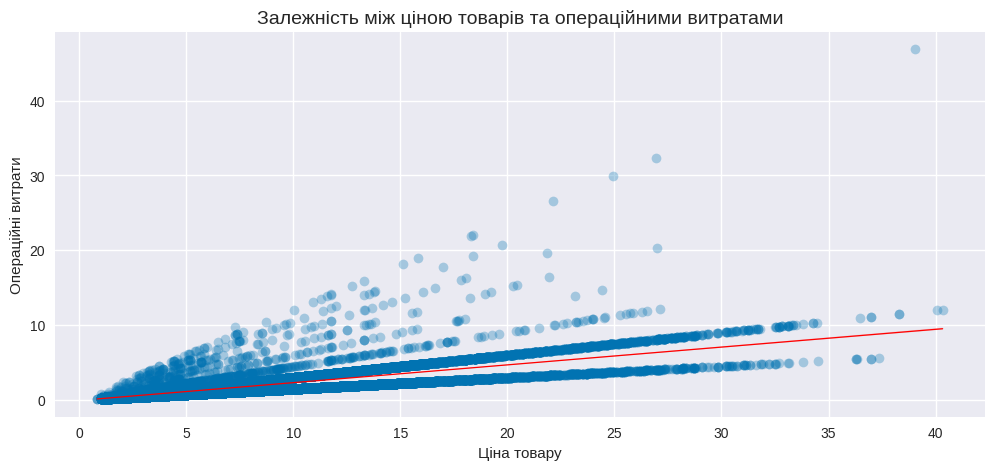

In [52]:
plt.figure(figsize=(12, 5))
x=clean_data['Price']
y=clean_data['Operating Cost']
sns.regplot(x=x, y=y, scatter_kws=dict(color=colors[0], alpha=.3), 
            line_kws=dict(color="r", 
            linewidth=0.9));
plt.xlabel('Ціна товару', fontsize=11)
plt.ylabel('Операційні витрати', fontsize=11)
plt.title('Залежність між ціною товарів та операційними витратами', 
         fontsize=14);


### Висновок:
Аналіз графіка лінії регресії вказує на наявність слабкої позитивної залежності між ціною товару та операційними витратами. Це свідчить про ефективне управління бізнесом операційними витратами. Однак важливо зазначити, що існує певна група товарів, де операційні витрати рівні або перевищують ціну товару.  

З метою оптимізації операційних витрат рекомендується провести детальний аналіз цієї групи товарів. Це включає в себе ретельний розгляд статей операційних витрат для кожного товару та прийняття стратегічних рішень, таких як припинення реалізації або оптимізація процесів зберігання та постачання.  

Додатковим ефективним заходом для зниження операційних витрат може бути збільшення маржинальності товарів та перегляд ціноутворення на відповідні товари. Це може сприяти збалансованій динаміці між цінами та витратами, що в кінцевому підсумку сприятиме покращенню фінансової ефективності певних категорій товарів у портфелі підприємства.  

<div style="text-align:center; font-size:20px;">Загальний висновок</div>

Фіналізуючи проведений аналіз, можна зробити наступні припущення:
1. Магазини даної мережі визначаються як міні-магазини, призначені для швидких та зручних покупок, зокрема доповнень до щоденних потреб та товарів для відпочинку(чипси, пиво, інші напої).
2. Доволі непоганий показник середнього життєвого циклу клієнтів можна пояснити розміщенням магазинів в житлових масивах, зокрема районах Бедок та Вудленд (Сінгапур), магазини в яких мають найбільшу відвідуваність, що додатково підтверджує теорію про формат магазинів "у дома".
3. Рівномірний розподіл кількості клієнтів протягом робочого дня вказує на різноманітність вікових груп покупців та їхніх індивідуальних розпорядків.
4. Підвищення сум продажів, за таких умов, можливе виключно за рахунок ефективного залучення нових клієнтів та подальшої вдалої стратегії їх утримання, а також за рахунок підвищення суми середнього чеку. Для цього, в першу чергу, необхідно провести ретельний аналіз всіх представлених товарів, виведення з обігу непопулярних одиниць або цілих категорій. Провести аналіз достатньості обсягів найпопулярніших товарів, щоб виключити ситуації їх несвоєчасного закінчення, що може призвести до звернення лояльних клієнтів до конкрурентів.
5. Перегляд існуючої бонусної програми та запровадження нових програм лояльності для постійних покупців.
6. Реалізувати стратегію зменшення операційних витрат по тим категорія продуктів, по яким ціни реалізації менші за суми таких операційних витрат, шляхом перегляду місць та способів зберігання такої продукції. 